In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [5]:
insurancedata=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurancedata.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


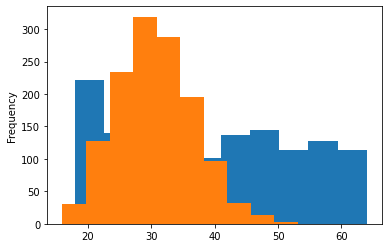

In [12]:
insurancedata["age"].plot(kind="hist")
insurancedata["bmi"].plot(kind="hist")

We cound see that age and bmi has two different scale.
The goal of normalisation is to change the values of numeric columns in a dataset to a common scale, with out distorting differences in range of values.
Different Techniques: 

*   Scale(also referred to as normalisation):Converts all values between 0 and without distorting orginal distribution. MinMaxScaler in Scikit Learn can be used to implement this. 
*   Standarization: Removes the mean and divides each value by satndard deviation. StandardScalar in Scikit Learn can be used to implement this.
This reduces the effect of outliers and trasform the distribution close to a  normal distribution.<br>

Additional reading: https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02



In [17]:
#data preprocessing
#importing required modules
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
#Create a column transformer
ct=make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),
    (OneHotEncoder(handle_unknown='ignore'),["sex","smoker","region"]))
#Create the X and y Values
X=insurancedata.drop("charges",axis=1)
y=insurancedata["charges"]
#Build out train and test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
#Fit the column transformer on training data
ct.fit(X_train)
X_train_normal=ct.transform(X_train)
X_test_normal=ct.transform(X_test)


In [21]:
#Check the data
print(X_train_normal[0])
print(X_train.shape,X_train_normal.shape)

[0.60869565 0.10734463 0.4        1.         0.         1.
 0.         0.         1.         0.         0.        ]
(1070, 6) (1070, 11)


In [27]:
#Model Building to fit the normailised data
#set the random feed to reproduce the data
tf.random.set_seed=42
#Create the model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#Comple the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics="mae")
#Fit the model
insurance_model.fit(X_train_normal,y_train,epochs=200)



Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13344.5684 - mae: 13344.5684
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13337.7812 - mae: 13337.7812
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 13319.9971 - mae: 13319.9971
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 13280.2168 - mae: 13280.2168
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 13207.1328 - mae: 13207.1328
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 13089.5381 - mae: 13089.5381
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 12916.8652 - mae: 12916.8652
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 12678.7510 - mae: 12678.7510
Epoch 9/200
34/34 [==============================] - 0s 4ms/step - loss: 12365.9326 - mae: 12365.9326
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 11970.39

In [28]:
insurance_model.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3171.0620 - mae: 3171.0620


[3171.06201171875, 3171.06201171875]